Link: https://www.kaggle.com/passnyc/data-science-for-good

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('2016 School Explorer.csv')

In [3]:
df.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


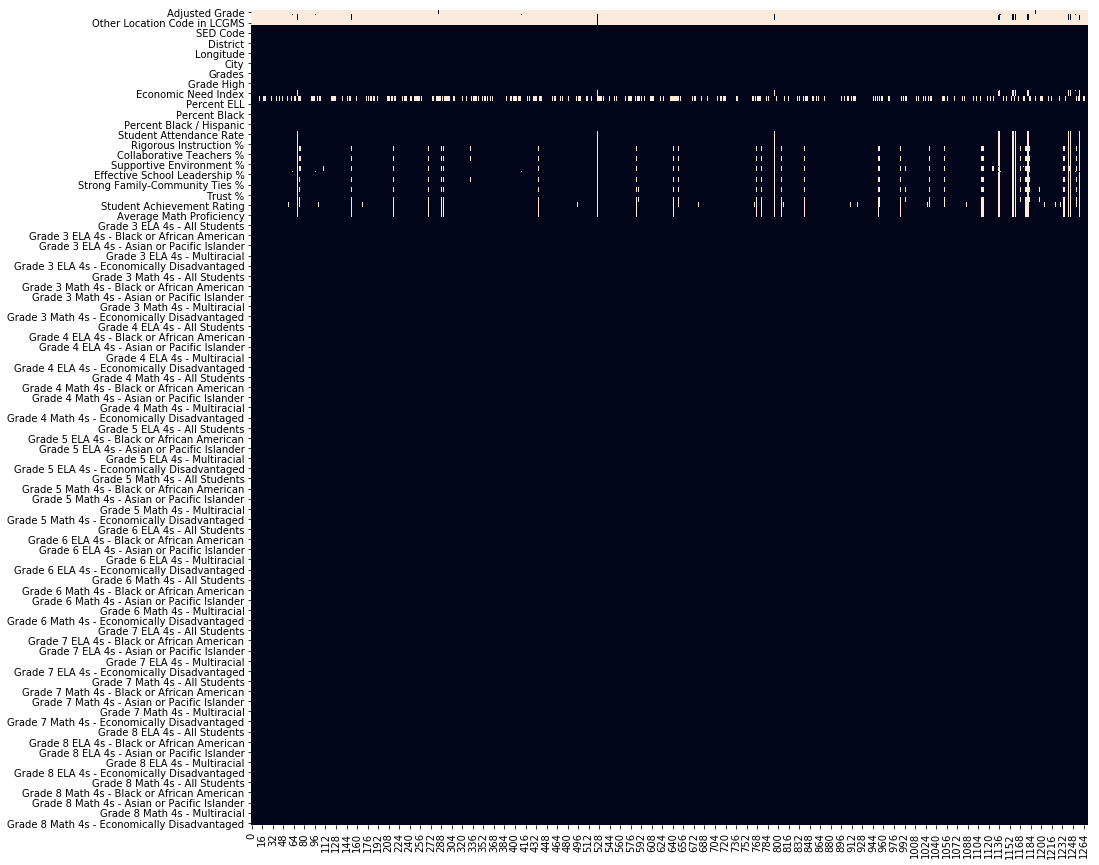

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(df.T.isnull(), cbar=False)

# Data Cleaning

In [5]:
sns.set(style="darkgrid")

# Sort values by District

df = df.sort_values(by = 'District')

# Clean "School income estimate" by removing all dollar symbols

df['School Income Estimate'] = df['School Income Estimate'].str.replace('$', '')

# Clean "School income estimate" by removing all commas

df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '')

# Remove all rows in "School Income Estimate" and "Economic Need Index" with NaN

df = df[pd.notnull(df['School Income Estimate'])]
df = df[pd.notnull(df['Economic Need Index'])]
df = df[pd.notnull(df['Rigorous Instruction Rating'])]
df = df[pd.notnull(df['Collaborative Teachers Rating'])]
df = df[pd.notnull(df['Supportive Environment Rating'])]
df = df[pd.notnull(df['Effective School Leadership Rating'])]
df = df[pd.notnull(df['Strong Family-Community Ties Rating'])]
df = df[pd.notnull(df['Trust Rating'])]
df = df[pd.notnull(df['Student Achievement Rating'])]



# Change all "School Income Estimate" types to Float

df['School Income Estimate'] = pd.to_numeric(df['School Income Estimate'])

# Change all Percents to Decimals and Floats

def p2f(x):
    return float(x.strip('%'))/100
df['Percent ELL'] = df['Percent ELL'].apply(p2f)
df['Percent Asian'] = df['Percent Asian'].apply(p2f)
df['Percent Black'] = df['Percent Black'].apply(p2f)
df['Percent Hispanic'] = df['Percent Hispanic'].apply(p2f)
df['Percent Black / Hispanic'] = df['Percent Black / Hispanic'].apply(p2f)
df['Percent White'] = df['Percent White'].apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].apply(p2f)
df['Percent of Students Chronically Absent'] = df['Percent of Students Chronically Absent'].apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].apply(p2f)
df['Trust %'] = df['Trust %'].apply(p2f)

# Change grading scale froom not, approaching, meeting and exceeding target to 0, 1, 2, 3 respectively.
mapping = {'Not Meeting Target': 0, 'Approaching Target': 1, 'Meeting Target': 2, 'Exceeding Target': 3}
df = df.replace({'Rigorous Instruction Rating': mapping, 'Collaborative Teachers Rating': mapping, 'Supportive Environment Rating': mapping, 'Effective School Leadership Rating': mapping, 'Strong Family-Community Ties Rating': mapping, 'Trust Rating': mapping, 'Student Achievement Rating': mapping})

# Remove First Three columns
df = df.drop(columns=['Adjusted Grade', 'New?', 'Other Location Code in LCGMS'])

# Reindex
df = df.reset_index()

# Drop Index column
df = df.drop(columns=['index'])

# Remove rows where attendace rates are equal to 0:
df = df[df['Student Attendance Rate']>0]

In [6]:
df.head()

,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",...,0,0,0,0,0,0,0,0,0,0
1,GIRLS PREPARATORY CHARTER SCHOOL OF NEW YORK,310100860866,84M330,1,40.719870,-73.977376,"442 E HOUSTON ST-RM 312 NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05",...,44,3,0,1,0,0,0,0,0,2
2,MANHATTAN CHARTER SCHOOL,310100860873,84M320,1,40.718230,-73.984082,"100 ATTORNEY ST NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05",...,0,0,0,0,0,0,0,0,0,0
3,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",310100011539,01M539,1,40.719500,-73.979239,"111 COLUMBIA ST NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05,06,07,08,09,10,11,12",...,0,0,0,0,0,0,0,0,0,0
4,NEIGHBORHOOD SCHOOL,310100010363,01M363,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Create a Pearson Correlation Matrix for Demographic Variables
student_demographic = df[['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian','Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White']]
student_demographic.corr()

,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White
Economic Need Index,1.000000,-0.891596,0.411252,-0.324299,0.318007,0.564841,0.780189,-0.779573
School Income Estimate,-0.891596,1.000000,-0.352614,0.243730,-0.274523,-0.498412,-0.682180,0.706577
Percent ELL,0.411252,-0.352614,1.000000,0.279981,-0.440487,0.532910,0.032305,-0.245283
Percent Asian,-0.324299,0.243730,0.279981,1.000000,-0.453865,-0.304923,-0.688966,0.110353
Percent Black,0.318007,-0.274523,-0.440487,-0.453865,1.000000,-0.384381,0.623432,-0.490667
Percent Hispanic,0.564841,-0.498412,0.532910,-0.304923,-0.384381,1.000000,0.482011,-0.384778
Percent Black / Hispanic,0.780189,-0.682180,0.032305,-0.688966,0.623432,0.482011,1.000000,-0.791712
Percent White,-0.779573,0.706577,-0.245283,0.110353,-0.490667,-0.384778,-0.791712,1.000000


In [8]:
# Pearson correlation matrix of ENI vs. School performance
school_rating = df[['Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']]
school_rating.corr()

,Economic Need Index,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Economic Need Index,1.000000,-0.612174,0.679742,-0.263544,-0.237858,-0.361685,-0.231725,-0.334910,-0.187854
Student Attendance Rate,-0.612174,1.000000,-0.966396,0.143558,0.207265,0.306179,0.247566,0.188143,0.228648
Percent of Students Chronically Absent,0.679742,-0.966396,1.000000,-0.171348,-0.226812,-0.317283,-0.263253,-0.218471,-0.239110
Rigorous Instruction %,-0.263544,0.143558,-0.171348,1.000000,0.698617,0.616720,0.597702,0.265528,0.533321
Collaborative Teachers %,-0.237858,0.207265,-0.226812,0.698617,1.000000,0.608913,0.908595,0.408199,0.875808
Supportive Environment %,-0.361685,0.306179,-0.317283,0.616720,0.608913,1.000000,0.516207,0.307945,0.583834
Effective School Leadership %,-0.231725,0.247566,-0.263253,0.597702,0.908595,0.516207,1.000000,0.443771,0.879225
Strong Family-Community Ties %,-0.334910,0.188143,-0.218471,0.265528,0.408199,0.307945,0.443771,1.000000,0.413765
Trust %,-0.187854,0.228648,-0.239110,0.533321,0.875808,0.583834,0.879225,0.413765,1.000000


# Plan Outline

1. My objective is to use the Passnyc to build a Regression model that predicts Student Attendance rate and then to interpret the results to investigate what factors influence the attendance rate.
    - Apply multiple optmized regression model and choose the best based on cross validation accuracy.
    - Annotate code
    - Note observations on changes and their effects i.e. features, models, parameters

2. Develop research question: 
- What are the most signifcant indicators for determining the economic need of a school and how do we use them to predict a given school's Economic Need Index?

3. Create Presentation.

In [9]:
# Display all columns
pd.set_option("display.max_columns", 999)

# Drop Unnecessary columns
df = df.drop(columns=df.loc[:,'Grade 3 ELA - All Students Tested': 'Grade 8 Math 4s - Economically Disadvantaged'].columns.tolist())

In [10]:
df.head()

,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency
0,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",PK,05,Yes,0.919,31141.72,0.09,0.05,0.32,0.60,0.92,0.01,0.94,0.18,0.89,2,0.94,2,0.86,3,0.91,3,0.85,2,0.94,3,1,2.14,2.17
1,GIRLS PREPARATORY CHARTER SCHOOL OF NEW YORK,310100860866,84M330,1,40.719870,-73.977376,"442 E HOUSTON ST-RM 312 NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05",0K,05,No,0.733,35223.30,0.02,0.02,0.45,0.49,0.94,0.02,0.94,0.18,0.90,2,0.93,3,0.85,2,0.88,3,0.87,2,0.90,2,2,2.72,2.83
2,MANHATTAN CHARTER SCHOOL,310100860873,84M320,1,40.718230,-73.984082,"100 ATTORNEY ST NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05",0K,05,No,0.733,34629.03,0.06,0.03,0.20,0.71,0.90,0.03,0.94,0.17,0.92,2,0.94,3,0.97,3,0.88,3,0.89,2,0.97,3,3,2.51,3.03
3,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",310100011539,01M539,1,40.719500,-73.979239,"111 COLUMBIA ST NEW YORK, NY 10002",NEW YORK,10002,"0K,01,02,03,04,05,06,07,08,09,10,11,12",0K,12,No,0.257,76833.96,0.00,0.33,0.09,0.11,0.20,0.42,0.97,0.03,0.81,3,0.73,1,0.85,2,0.55,0,0.81,1,0.74,0,3,3.83,4.03
4,NEIGHBORHOOD SCHOOL,310100010363,01M363,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",NEW YORK,10009,"PK,0K,01,02,03,04,05",PK,05,No,0.430,57504.48,0.04,0.05,0.13,0.34,0.47,0.45,0.93,0.23,0.99,3,0.97,3,0.95,2,0.96,3,0.95,3,0.99,3,1,2.55,2.68


# Exploratory Data Analysis

In [11]:
pd.set_option("display.max_columns", 999)
df.describe()

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency
count,7.900000e+02,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,3.296357e+11,16.865823,40.728447,-73.918682,10842.417722,0.663118,48873.008949,0.129215,0.126506,0.300127,0.398747,0.698785,0.152468,0.935582,0.209722,0.908342,2.006329,0.886709,2.191139,0.904203,2.073418,0.808114,1.892405,0.848759,1.718987,0.906291,2.112658,1.931646,2.548608,2.724190
std,1.232550e+10,9.312473,0.087257,0.085222,527.257246,0.224970,21480.837500,0.109431,0.184412,0.291650,0.260253,0.307053,0.217333,0.023639,0.120781,0.046952,0.744195,0.067831,0.690455,0.055156,0.684559,0.096597,0.877731,0.044505,0.766550,0.057957,0.772609,0.677643,0.347498,0.437919
min,3.101000e+11,1.000000,40.508835,-74.244025,10001.000000,0.059000,18409.760000,0.000000,0.000000,0.000000,0.020000,0.030000,0.000000,0.860000,0.000000,0.680000,0.000000,0.550000,0.000000,0.650000,0.000000,0.340000,0.000000,0.720000,0.000000,0.620000,0.000000,0.000000,1.970000,1.900000
25%,3.209000e+11,9.000000,40.665454,-73.960074,10453.000000,0.531500,33668.392500,0.040000,0.010000,0.050000,0.170000,0.410000,0.010000,0.920000,0.110000,0.880000,1.000000,0.850000,2.000000,0.870000,2.000000,0.760000,1.000000,0.820000,1.000000,0.880000,2.000000,1.000000,2.270000,2.360000
50%,3.317000e+11,17.000000,40.715283,-73.921372,11205.000000,0.729000,43879.400000,0.100000,0.040000,0.200000,0.340000,0.870000,0.030000,0.940000,0.190000,0.910000,2.000000,0.900000,2.000000,0.910000,2.000000,0.830000,2.000000,0.840000,2.000000,0.920000,2.000000,2.000000,2.480000,2.650000
75%,3.425000e+11,25.000000,40.809216,-73.875092,11233.750000,0.849000,59429.877500,0.180000,0.160000,0.530000,0.630000,0.960000,0.230000,0.950000,0.300000,0.940000,3.000000,0.940000,3.000000,0.950000,3.000000,0.880000,3.000000,0.870000,2.000000,0.950000,3.000000,2.000000,2.780000,3.037500
max,3.531009e+11,32.000000,40.903455,-73.708920,11694.000000,0.957000,181382.060000,0.660000,0.950000,0.970000,0.980000,0.990000,0.920000,1.000000,0.570000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,0.990000,3.000000,0.990000,3.000000,1.000000,3.000000,3.000000,3.930000,4.150000


In [12]:
# Create a Pearson Correlation Matrix for Demographic Variables
student_demographic = df[['Economic Need Index', 'Student Attendance Rate', 'School Income Estimate', 'Percent ELL', 'Percent Asian','Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White']]
student_demographic.corr()

,Economic Need Index,Student Attendance Rate,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White
Economic Need Index,1.000000,-0.612174,-0.891596,0.411252,-0.324299,0.318007,0.564841,0.780189,-0.779573
Student Attendance Rate,-0.612174,1.000000,0.489698,0.048046,0.493046,-0.390761,-0.255374,-0.586982,0.393568
School Income Estimate,-0.891596,0.489698,1.000000,-0.352614,0.243730,-0.274523,-0.498412,-0.682180,0.706577
Percent ELL,0.411252,0.048046,-0.352614,1.000000,0.279981,-0.440487,0.532910,0.032305,-0.245283
Percent Asian,-0.324299,0.493046,0.243730,0.279981,1.000000,-0.453865,-0.304923,-0.688966,0.110353
Percent Black,0.318007,-0.390761,-0.274523,-0.440487,-0.453865,1.000000,-0.384381,0.623432,-0.490667
Percent Hispanic,0.564841,-0.255374,-0.498412,0.532910,-0.304923,-0.384381,1.000000,0.482011,-0.384778
Percent Black / Hispanic,0.780189,-0.586982,-0.682180,0.032305,-0.688966,0.623432,0.482011,1.000000,-0.791712
Percent White,-0.779573,0.393568,0.706577,-0.245283,0.110353,-0.490667,-0.384778,-0.791712,1.000000


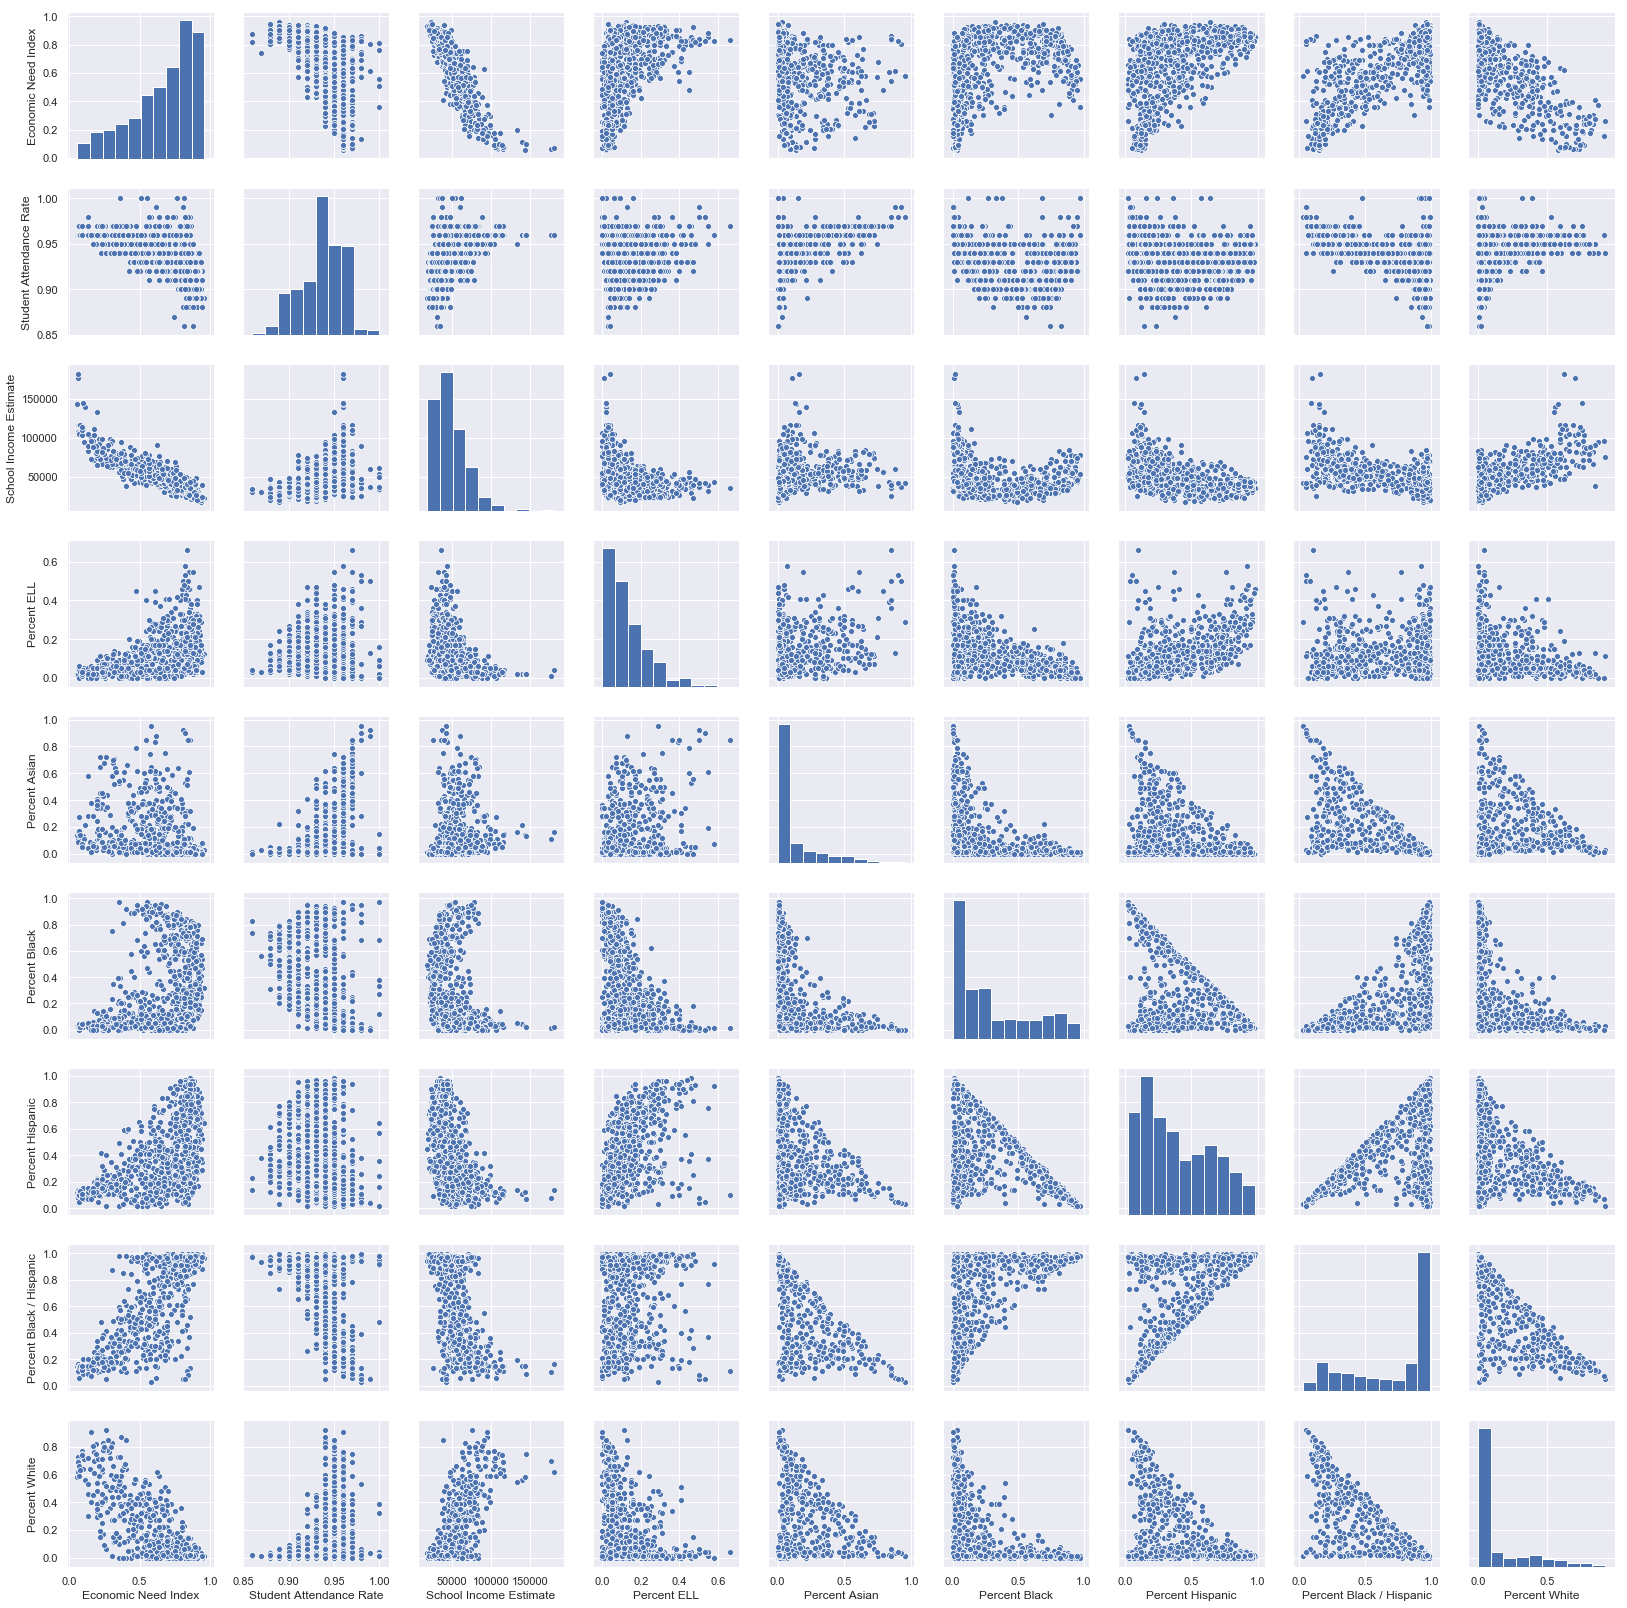

In [13]:
# Display correlations
sns.pairplot(student_demographic)

In [14]:
# Pearson correlation matrix of ENI vs. School performance
school_rating = df[['Economic Need Index', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']]
school_rating.corr()

,Economic Need Index,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Economic Need Index,1.000000,-0.612174,0.679742,-0.263544,-0.237858,-0.361685,-0.231725,-0.334910,-0.187854
Student Attendance Rate,-0.612174,1.000000,-0.966396,0.143558,0.207265,0.306179,0.247566,0.188143,0.228648
Percent of Students Chronically Absent,0.679742,-0.966396,1.000000,-0.171348,-0.226812,-0.317283,-0.263253,-0.218471,-0.239110
Rigorous Instruction %,-0.263544,0.143558,-0.171348,1.000000,0.698617,0.616720,0.597702,0.265528,0.533321
Collaborative Teachers %,-0.237858,0.207265,-0.226812,0.698617,1.000000,0.608913,0.908595,0.408199,0.875808
Supportive Environment %,-0.361685,0.306179,-0.317283,0.616720,0.608913,1.000000,0.516207,0.307945,0.583834
Effective School Leadership %,-0.231725,0.247566,-0.263253,0.597702,0.908595,0.516207,1.000000,0.443771,0.879225
Strong Family-Community Ties %,-0.334910,0.188143,-0.218471,0.265528,0.408199,0.307945,0.443771,1.000000,0.413765
Trust %,-0.187854,0.228648,-0.239110,0.533321,0.875808,0.583834,0.879225,0.413765,1.000000


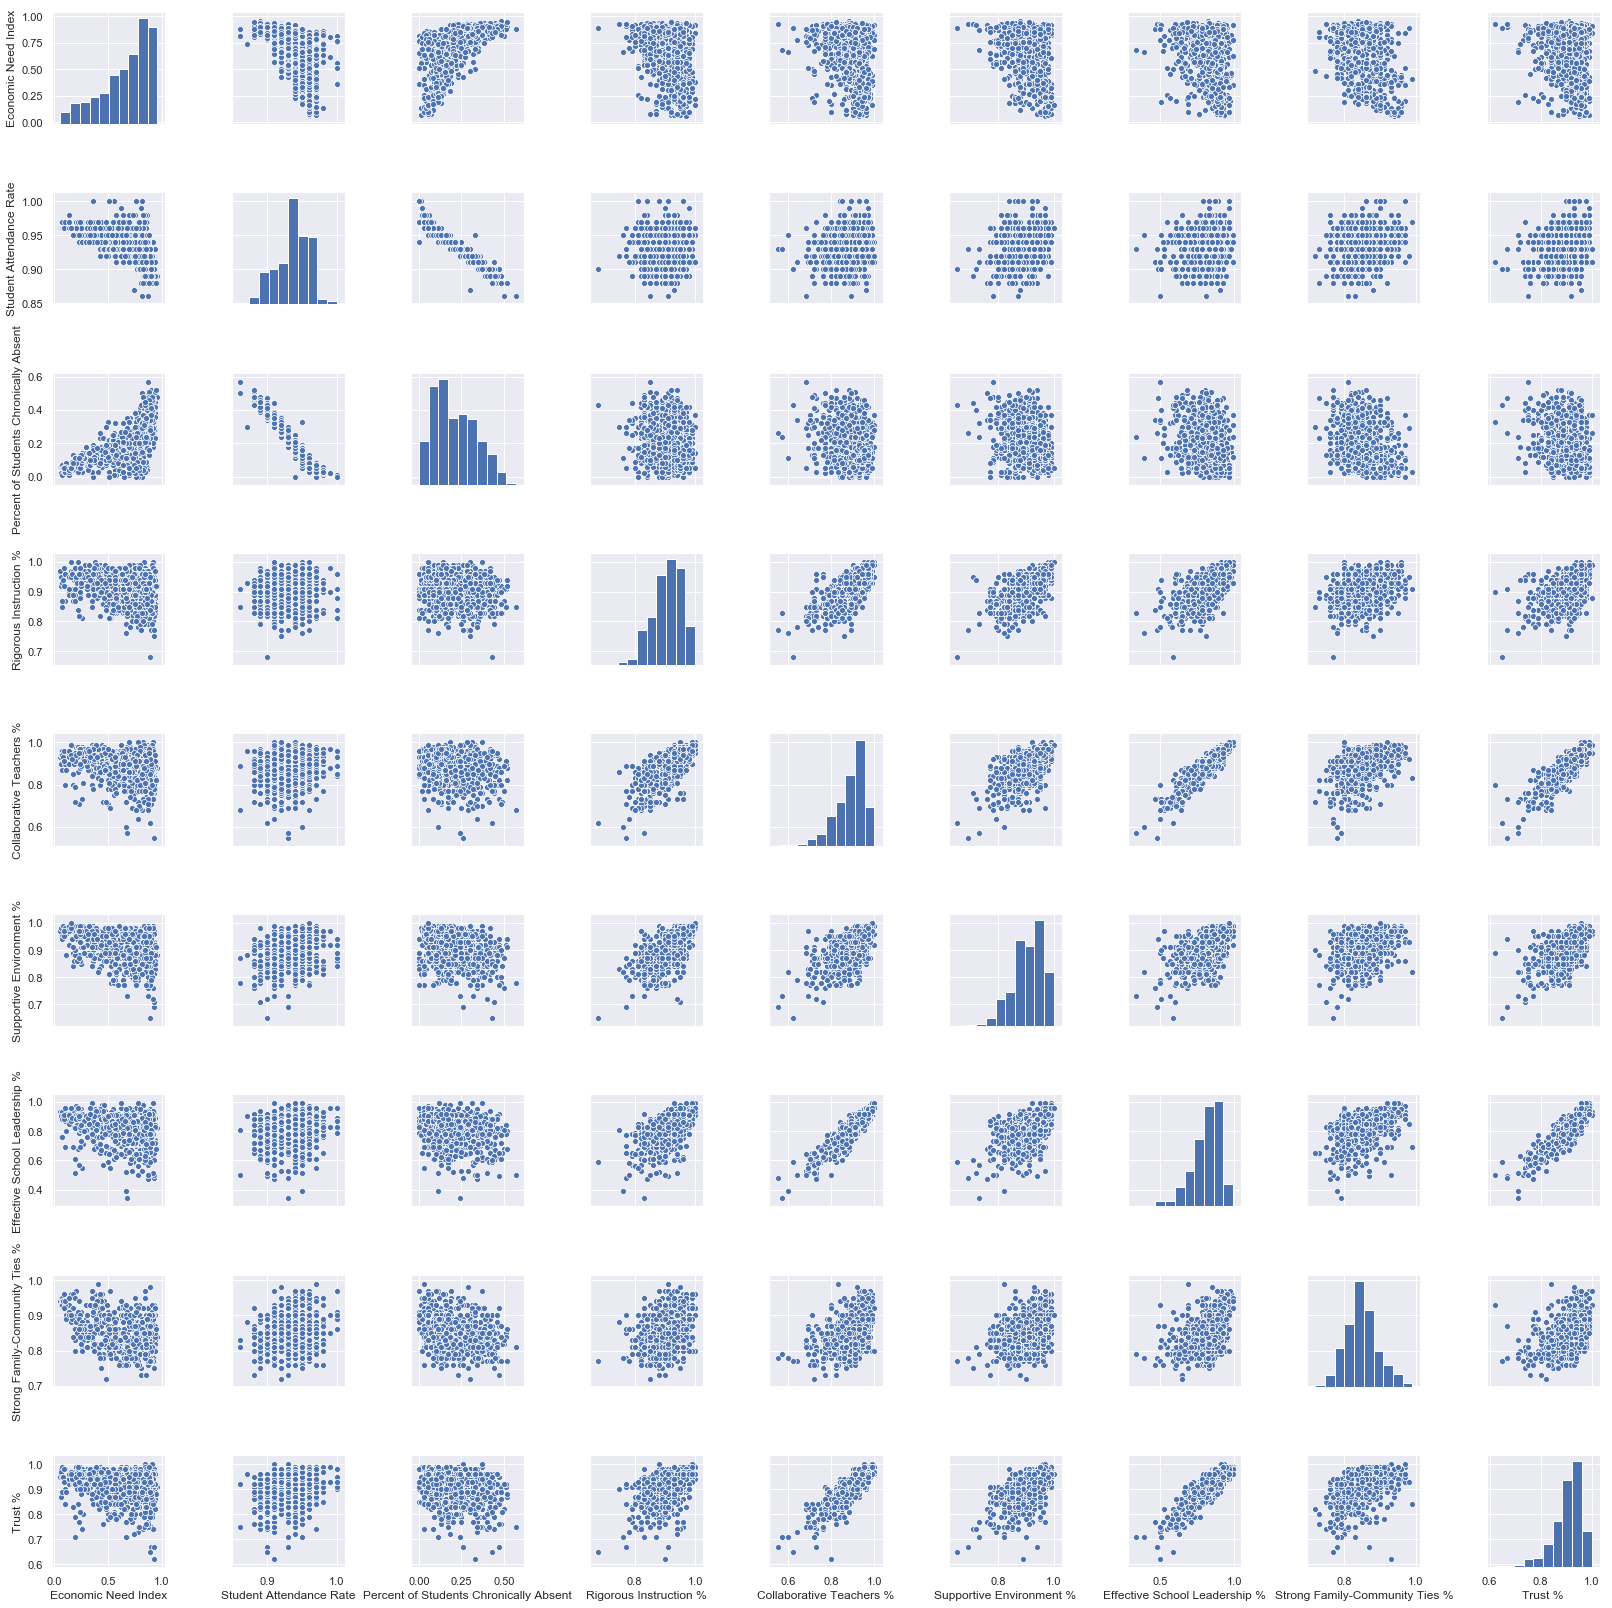

In [15]:
# Visualize correlations
sns.pairplot(school_rating)

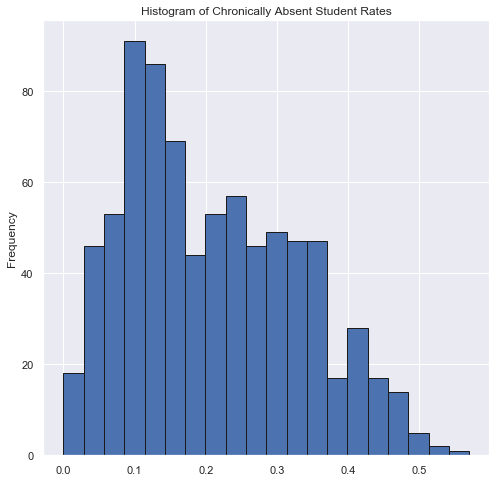

In [16]:
# Histogram of chronically absent rates 
plt.figure(figsize=(8,8))
plt.hist(df['Percent of Students Chronically Absent'], bins=20, edgecolor='k')
plt.title('Histogram of Chronically Absent Student Rates')
plt.ylabel('Frequency')
plt.show()

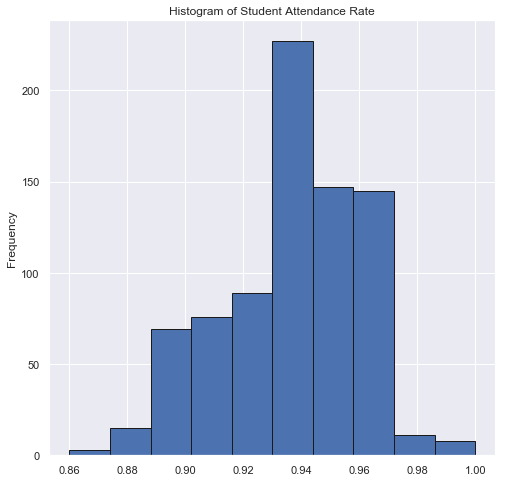

In [17]:
# Histogram of Student Attendance rates (Target variable) 
plt.figure(figsize=(8,8))
plt.hist(df['Student Attendance Rate'], edgecolor='k')
plt.title('Histogram of Student Attendance Rate')
plt.ylabel('Frequency')
plt.show()

In [18]:
df['Student Attendance Rate'].describe()

count    790.000000
mean       0.935582
std        0.023639
min        0.860000
25%        0.920000
50%        0.940000
75%        0.950000
max        1.000000
Name: Student Attendance Rate, dtype: float64

### Observations

- Most of the school score data have almost normal distrubtions which can be left as they are
- Certain data may need to be transformed because of their lack of normality to improve regression model

# Feature Engineering and Selection

In [19]:
df.info()
features = df.drop(columns=['SED Code', 'Location Code', 'Address (Full)', 'Grades', 'Grade Low', 'Grade High', 'Zip'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 794
Data columns (total 38 columns):
School Name                               790 non-null object
SED Code                                  790 non-null int64
Location Code                             790 non-null object
District                                  790 non-null int64
Latitude                                  790 non-null float64
Longitude                                 790 non-null float64
Address (Full)                            790 non-null object
City                                      790 non-null object
Zip                                       790 non-null int64
Grades                                    790 non-null object
Grade Low                                 790 non-null object
Grade High                                790 non-null object
Community School?                         790 non-null object
Economic Need Index                       790 non-null float64
School Income Estimate     

In [20]:
features = pd.get_dummies(features, columns=['District', 'City', 'Community School?'])

In [21]:
features.head()

,School Name,Latitude,Longitude,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,District_1,District_2,District_3,District_4,District_5,District_6,District_7,District_8,District_9,District_10,District_11,District_12,District_13,District_14,District_15,District_16,District_17,District_18,District_19,District_20,District_21,District_22,District_23,District_24,District_25,District_26,District_27,District_28,District_29,District_30,District_31,District_32,City_ARVERNE,City_ASTORIA,City_BAYSIDE,City_BELLEROSE,City_BROAD CHANNEL,City_BRONX,City_BROOKLYN,City_CAMBRIA HEIGHTS,City_COLLEGE POINT,City_CORONA,City_DOUGLASTON,City_EAST ELMHURST,City_ELMHURST,City_FAR ROCKAWAY,City_FLORAL PARK,City_FLUSHING,City_FOREST HILLS,City_GLENDALE,City_HOLLIS,City_HOWARD BEACH,City_JACKSON HEIGHTS,City_JAMAICA,City_KEW GARDENS,City_LITTLE NECK,City_LONG ISLAND CITY,City_MASPETH,City_MIDDLE VILLAGE,City_NEW YORK,City_OZONE PARK,City_QUEENS VILLAGE,City_REGO PARK,City_RICHMOND HILL,City_RIDGEWOOD,City_ROCKAWAY BEACH,City_ROCKAWAY PARK,City_ROOSEVELT ISLAND,City_ROSEDALE,City_SAINT ALBANS,City_SOUTH OZONE PARK,City_SOUTH RICHMOND HILL,City_SPRINGFIELD GARDENS,City_STATEN ISLAND,City_WHITESTONE,City_WOODHAVEN,City_WOODSIDE,Community School?_No,Community School?_Yes
0,P.S. 015 ROBERTO CLEMENTE,40.721834,-73.978766,0.919,31141.72,0.09,0.05,0.32,0.60,0.92,0.01,0.94,0.18,0.89,2,0.94,2,0.86,3,0.91,3,0.85,2,0.94,3,1,2.14,2.17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,GIRLS PREPARATORY CHARTER SCHOOL OF NEW YORK,40.719870,-73.977376,0.733,35223.30,0.02,0.02,0.45,0.49,0.94,0.02,0.94,0.18,0.90,2,0.93,3,0.85,2,0.88,3,0.87,2,0.90,2,2,2.72,2.83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,MANHATTAN CHARTER SCHOOL,40.718230,-73.984082,0.733,34629.03,0.06,0.03,0.20,0.71,0.90,0.03,0.94,0.17,0.92,2,0.94,3,0.97,3,0.88,3,0.89,2,0.97,3,3,2.51,3.03,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",40.719500,-73.979239,0.257,76833.96,0.00,0.33,0.09,0.11,0.20,0.42,0.97,0.03,0.81,3,0.73,1,0.85,2,0.55,0,0.81,1,0.74,0,3,3.83,4.03,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,NEIGHBORHOOD SCHOOL,40.724404,-73.986360,0.430,57504.48,0.04,0.05,0.13,0.34,0.47,0.45,0.93,0.23,0.99,3,0.97,3,0.95,2,0.96,3,0.95,3,0.99,3,1,2.55,2.68,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Establish a Baseline model

In [22]:
# Instantiate a KNN regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
knn = KNeighborsRegressor(n_neighbors=10)

# Define predictor and target variables
x = features.drop(columns=['School Name', 'Student Attendance Rate'])
y = features['Student Attendance Rate']

# Split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train model on training set
knn.fit(x_train, y_train)

# Score model on test set
print(knn.score(x_test, y_test))

# Cross Validate
print(cross_val_score(knn, x, y, cv=5))

0.2946667365724678
[ 0.18887694 -0.06510519  0.14951252  0.13957913 -0.14057939]


### KNN

KNN is a terrible model for this data set

In [23]:
# Instantiate an OLS Regression
from sklearn.linear_model import LinearRegression
lg = LinearRegression()

# Define predictor and target variables
x = features.drop(columns=['School Name', 'Student Attendance Rate'])
y = features['Student Attendance Rate']

# Split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train model on training set
lg.fit(x_train, y_train)

# Score model on test set
print(lg.score(x_test, y_test))

# Cross Validate
print(cross_val_score(lg, x, y, cv=5))

0.891782600000575
[0.92356628 0.87946075 0.92524156 0.94884494 0.88273549]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


### OLS

OLS predicts scores very highly on this data set. But we need to check to see if underlying assumptions are met of this model.

In [24]:
# Instantiate a Gradient Boosting Regression
from sklearn import ensemble

gbr = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=2, learning_rate=0.1)

# Define predictor and target variables
x = features.drop(columns=['School Name', 'Student Attendance Rate'])
y = features['Student Attendance Rate']

# Split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train model on training set
gbr.fit(x_train, y_train)

# Score model on test set
print(gbr.score(x_test, y_test))

0.87790654700025


### Gradient Boosting Regressor

GBR predicts well to and looks like it can be optimized through feature engineering.

## Steps moving forward

1. Engineer further features and rerun models
2. Rank feaatures and filter the most important ones then rerun model